In [1]:
 #!git clone https://github.com/ultralytics/yolov5
 #!pip install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 7319, done.
remote: Counting objects: 100% (441/441), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 7319 (delta 271), reused 301 (delta 176), pack-reused 6878
Receiving objects: 100% (7319/7319), 9.21 MiB | 10.71 MiB/s, done.
Resolving deltas: 100% (4999/4999), done.
     |████████████████████████████████| 645kB 4.3MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!python yolov5/train.py --img 416 --batch 16 --epochs 300 --data data/alpr.yaml --cfg yolov5/models/yolov5s.yaml

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='yolov5/models/yolov5s.yaml', data='data/alpr.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_period=-1, single_cls=False, sync_bn=False, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-215-g5bab9a2 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='yolov5/models

In [4]:
!git clone https://github.com/openalpr/benchmarks

Cloning into 'benchmarks'...
remote: Enumerating objects: 1752, done.
remote: Total 1752 (delta 0), reused 0 (delta 0), pack-reused 1752
Receiving objects: 100% (1752/1752), 187.98 MiB | 23.03 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
!python yolov5/detect.py --source benchmarks/endtoend/us --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

In [9]:
!python yolov5/detect.py --source data/val/images/Cars101.png --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=True, source='data/val/images/Cars101.png', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-215-g5bab9a2 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!python yolov5/detect.py --source 0 --conf 0.4 --weights runs/train/exp/weights/best.pt

In [ ]:
#!pip install easyocr

In [24]:
import easyocr
import os

In [38]:
# read .txt to get x,y,w,h of ALPR
def read_txt(filepath):
    f = open(filepath, 'r')
    lines = f.readlines()
    
    # read objects from each line of .txt
    objects = []
    for line in lines:
        line=line.rstrip()
        obj = [int(float(i)) for i in line.split(' ')]
        objects.append(obj)
    #print(objects)
    return objects

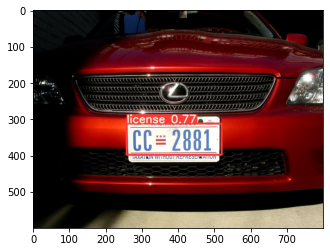

In [107]:
plt.imshow(image)

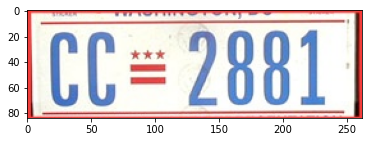

In [105]:
detection_threshold = 0.7
image_path = os.path.join("runs/detect/exp/", "us10.jpg")
label_path = os.path.join("runs/detect/exp/labels/", "us10.txt")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
with open(label_path, 'r') as f:
    line = f.readline()

coords = np.array(line.split()).astype(float)
c, x, y, w, h = coords
ind_x = int(image.shape[1]*x)
width = int(image.shape[1]*w)
ind_y = int(image.shape[0]*y)
height = int(image.shape[0]*h)

img_crop = image[ind_y-int(height/2):ind_y+int(height/2), ind_x-int(width/2):ind_x+int(width/2)]
plt.imshow(img_crop)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
reader = easyocr.Reader(['en'])

In [106]:
ocr_result = reader.readtext(img_crop)
print(ocr_result)

[([[8, 8], [80, 8], [80, 84], [8, 84]], 'CC', 0.9900136422652952), ([[114, 6], [244, 6], [244, 84], [114, 84]], '2881', 0.5433976057858135)]


In [83]:
image.shape

(300, 400, 3)

In [108]:
from google.colab import drive 
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive
